# The plan

* Live "Presentation" with Jupyter Notebooks, guaranteed not to work
* Pandas
* You lot trolling me

# Top Level Funky Stuff

* Data Import / Export functionality
* *Actually Decent* Datetime Operations
* Boiled in Statistics
* Groupby operations
* Integrations (`seaborn`,`cufflinks`)

# FYI / Disclaimers
* NI Postcode Data Sucks
* NI Constituency Boundaries Suck
* This has not been updated with corrected DfE RHI Claimant Data as it was not output in an open, readable format, so the below is shown only for educational purposes and no political or journalistic decision making should be based on its content...

# Requirements
* condable (or pip as backup)
    * pandas matplotlib seaborn beautifulsoup4 lxml xlrd requests'
* pip
    * cufflinks
* Rise presentation funkiness (requires python == 3.5)
    * https://github.com/damianavila/RISE
    
# Data Sources
* Election Office Constituency/Postcode data - http://www.eoni.org.uk/Elections/Electoral-areas
* RHI Data - Friendly Slackers


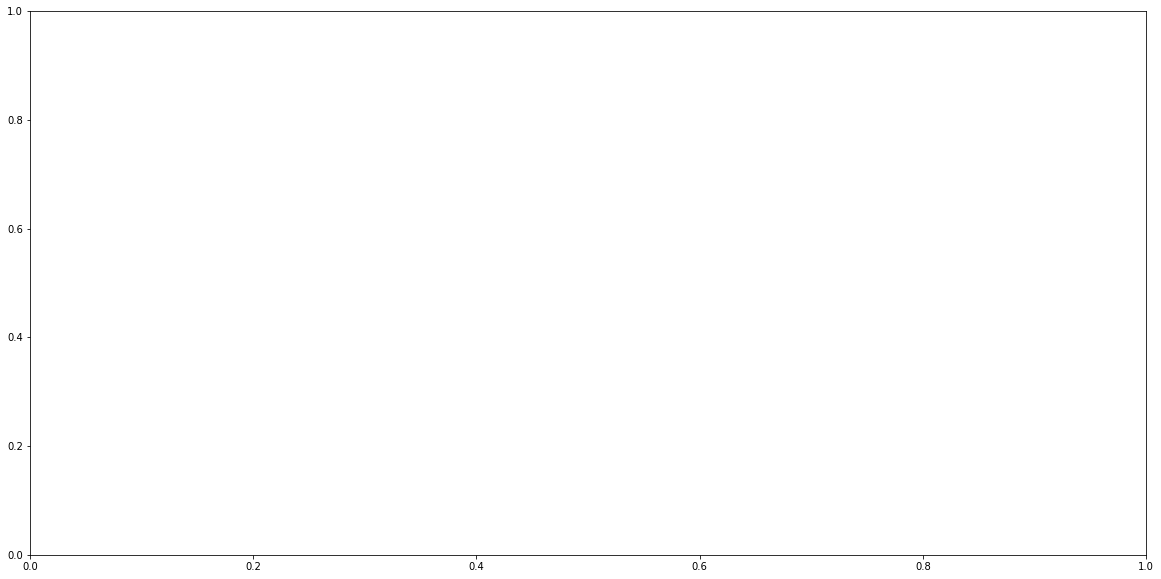

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)


## Ingress and Formatting

In [4]:
rhi_csv = 'rhi-nondomestic-beneficiaries-ltd-companies-organisations.csv'
df = pd.read_csv(rhi_csv)
display(df.head())
display(df.dtypes)

,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99,"£27,600.66"
0,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£30,507.19"
1,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£34,416.23"
2,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£50,543.44"
3,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£52,297.88"
4,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£53,369.70"


Acheson & Glover Precast Ltd     object
06/11/2015                       object
BT75                             object
Solid Biomass Boiler             object
99                              float64
£27,600.66                       object
dtype: object

In [5]:
df = pd.read_csv(rhi_csv, 
                 names=['Company','Date','Postcode',
                        'Type','Capacity (kWtH)', 'Cash']
                )
display(df.head())
display(df.dtypes)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
0,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£27,600.66"
1,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£30,507.19"
2,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£34,416.23"
3,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£50,543.44"
4,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£52,297.88"


Company             object
Date                object
Postcode            object
Type                object
Capacity (kWtH)    float64
Cash                object
dtype: object

In [6]:
df = pd.read_csv(rhi_csv, 
                 names=['Company','Date','Postcode',
                        'Type','Capacity (kWtH)', 'Cash']                )
df['Date'] = pd.to_datetime(df['Date'])

display(df.head())
display(df.dtypes)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
0,Acheson & Glover Precast Ltd,2015-06-11,BT75,Solid Biomass Boiler,99.0,"£27,600.66"
1,Acheson & Glover Precast Ltd,2015-06-11,BT75,Solid Biomass Boiler,99.0,"£30,507.19"
2,Acheson & Glover Precast Ltd,2015-06-11,BT75,Solid Biomass Boiler,99.0,"£34,416.23"
3,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,"£50,543.44"
4,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,"£52,297.88"


Company                    object
Date               datetime64[ns]
Postcode                   object
Type                       object
Capacity (kWtH)           float64
Cash                       object
dtype: object

In [7]:
df = pd.read_csv(rhi_csv, 
                 names=['Company','Date','Postcode',
                        'Type','Capacity (kWtH)', 'Cash']                )
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

display(df.head())
display(df.dtypes)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
0,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,"£27,600.66"
1,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,"£30,507.19"
2,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,"£34,416.23"
3,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,"£50,543.44"
4,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,"£52,297.88"


Company                    object
Date               datetime64[ns]
Postcode                   object
Type                       object
Capacity (kWtH)           float64
Cash                       object
dtype: object

In [8]:
df = pd.read_csv(rhi_csv, 
                 names=['Company','Date','Postcode',
                        'Type','Capacity (kWtH)', 'Cash']
                )
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Cash'] = df['Cash'].replace('[£,]','', regex=True).astype(float)

display(df.head())
display(df.dtypes)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
0,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,27600.66
1,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,30507.19
2,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,34416.23
3,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,50543.44
4,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,52297.88


Company                    object
Date               datetime64[ns]
Postcode                   object
Type                       object
Capacity (kWtH)           float64
Cash                      float64
dtype: object

## Stats and Basic Grouping

In [9]:
df.Cash.describe()

count       874.000000
mean      31603.964554
std       21591.062908
min          73.220000
25%       14771.700000
50%       28999.740000
75%       44733.297500
max      252844.050000
Name: Cash, dtype: float64

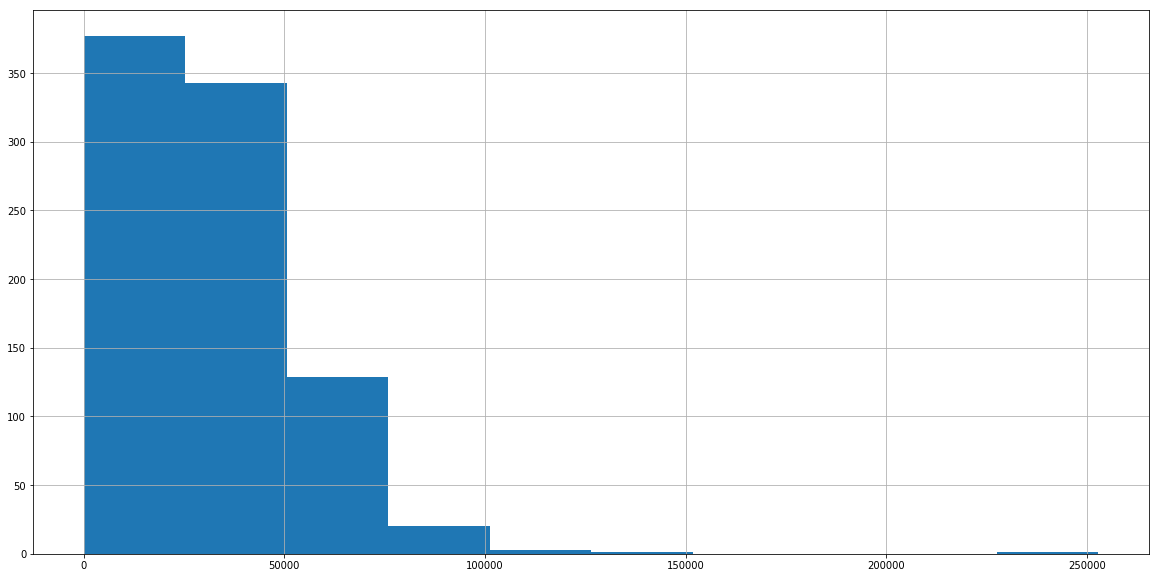

In [10]:
f,ax = plt.subplots()
df.Cash.hist(ax=ax)

In [11]:
df.Postcode.unique()

array(['BT75', 'BT80', 'BT62', 'BT46', 'BT70', 'BT31', 'BT81', 'BT79',
       'BT77', 'BT44', 'BT94', 'BT60', 'BT78', 'BT92', 'BT28', 'BT61', nan,
       'BT54', 'BT39', 'BT34', 'BT19', 'BT20', 'BT53', 'BT67', 'BT63',
       'BT23', 'BT42', 'BT09', 'BT08', 'BT29', 'BT74', 'BT25', 'BT45',
       'BT04', 'BT27', 'BT33', 'BT68', 'BT71', 'BT47', 'BT35', 'BT12',
       'BT43', 'BT41', 'BT32', 'BT22', 'BT21', 'BT51', 'BT48', 'BT49',
       'BT24', 'BT17', 'BT06', 'BT93', 'BT82', 'BT66', 'BT56', 'BT26',
       'BT40', 'BT76', 'BT05', 'BA14', 'BT36', 'Bt78', 'BT03', 'BT64',
       'BT57'], dtype=object)

In [12]:
df.Postcode.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
849    False
850    False
851    False
852    False
853    False
854    False
855    False
856    False
857    False
858    False
859    False
860    False
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
Name: Postcode, dtype: bool

In [13]:
df.dropna(how='all', inplace=True)
df.Postcode.sort_values().unique()

array(['BA14', 'BT03', 'BT04', 'BT05', 'BT06', 'BT08', 'BT09', 'BT12',
       'BT17', 'BT19', 'BT20', 'BT21', 'BT22', 'BT23', 'BT24', 'BT25',
       'BT26', 'BT27', 'BT28', 'BT29', 'BT31', 'BT32', 'BT33', 'BT34',
       'BT35', 'BT36', 'BT39', 'BT40', 'BT41', 'BT42', 'BT43', 'BT44',
       'BT45', 'BT46', 'BT47', 'BT48', 'BT49', 'BT51', 'BT53', 'BT54',
       'BT56', 'BT57', 'BT60', 'BT61', 'BT62', 'BT63', 'BT64', 'BT66',
       'BT67', 'BT68', 'BT70', 'BT71', 'BT74', 'BT75', 'BT76', 'BT77',
       'BT78', 'BT79', 'BT80', 'BT81', 'BT82', 'BT92', 'BT93', 'BT94',
       'Bt78'], dtype=object)

In [14]:
# df['Postcode'] = df['Postcode'].apply(str.upper)
df['Postcode'] = df['Postcode'].str.upper() 


In [15]:
df[df.Postcode=='BA14'] # df.query("Postcode == 'BA14'")

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
616,National Trust (Crom Estate),2014-01-27,BA14,Solid Biomass Boiler,99.0,31564.68
617,National Trust (Florence Court),2015-05-28,BA14,Solid Biomass Boiler,36.0,3148.25
618,National Trust (Giant's Causeway Visitors' Cen...,2015-02-23,BA14,Ground Source Heat Pump (GSHP),71.0,8634.47
619,National Trust (Innisfee),2013-11-30,BA14,Solid Biomass Boiler,99.0,22766.50
620,National Trust (Springhill House),2013-11-30,BA14,Solid Biomass Boiler,80.0,22717.76
621,National Trust (Springhill),2013-11-30,BA14,Solid Biomass Boiler,30.0,4133.90
622,National Trust (The Argory),2015-11-01,BA14,Solid Biomass Boiler,95.0,6005.90
623,National Trust (The Argory),2015-11-01,BA14,Solid Biomass Boiler,35.0,3448.73


In [16]:
df.groupby('Postcode')['Cash'].sum().sort_values().head(20)

Postcode
BT21    22866.87
BT64    24221.85
BT56    28305.90
BT63    28336.19
BT17    32642.83
BT06    34574.91
BT26    39251.72
BT36    42028.65
BT57    46342.01
BT40    48995.53
BT81    51449.64
BT22    52931.06
BT03    57728.22
BT54    62948.10
BT04    65704.29
BT43    68431.81
BT20    69649.89
BT24    77451.18
BT76    85234.82
BT19    90062.63
Name: Cash, dtype: float64

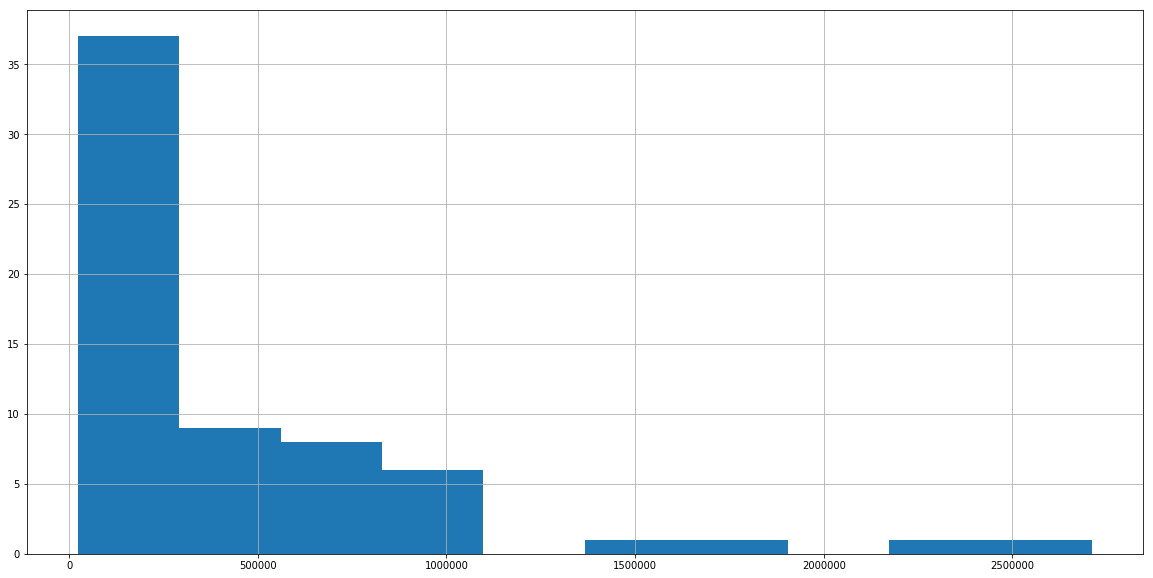

In [17]:
f,ax = plt.subplots()
_=df.groupby('Postcode')['Cash'].sum().hist(ax=ax)

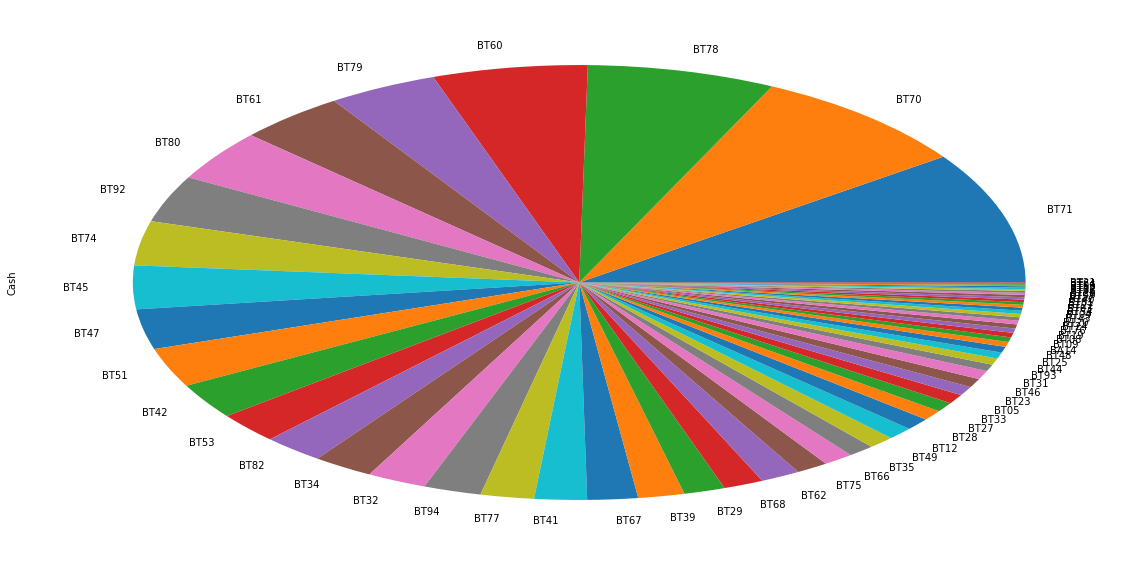

In [18]:
f,ax = plt.subplots()
_=df.groupby('Postcode')['Cash'].sum().sort_values(ascending=False).plot.pie(ax=ax)

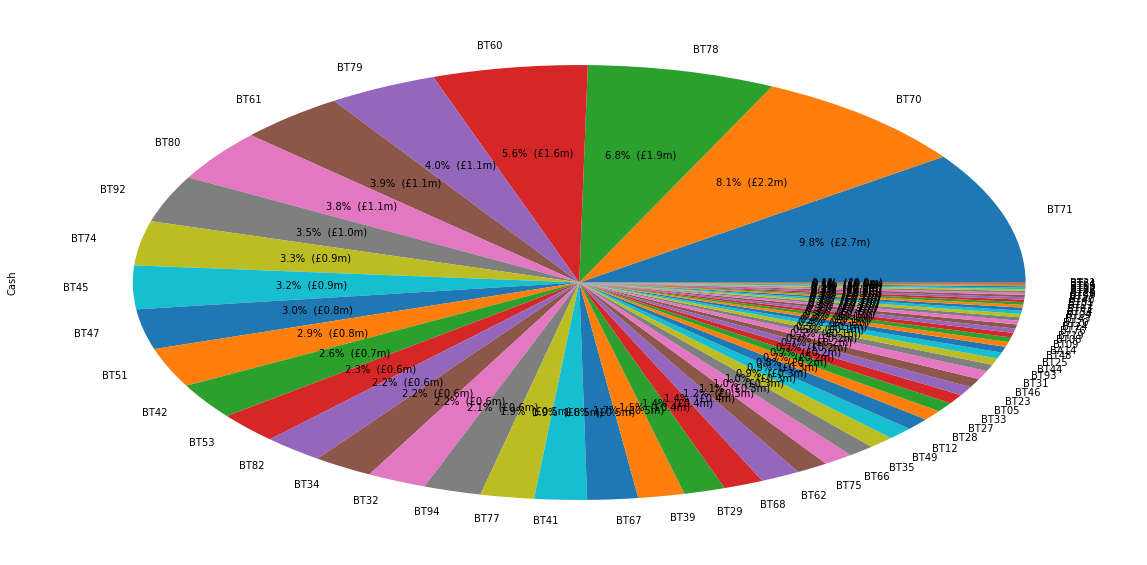

In [19]:
def make_autopct(total):
    def my_autopct(pct):
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  (£{v:,.1f}m)'.format(p=pct,v=val/1000000)
    return my_autopct

f,ax = plt.subplots()
_=df.groupby('Postcode')['Cash'].sum().sort_values(ascending=False)\
    .plot.pie(ax=ax, autopct=make_autopct(df.Cash.sum()))

## Web Assets and Joins (AKA BeautifulSoup)

In [20]:
ea_url = "http://www.eoni.org.uk/Elections/Electoral-areas"
import urllib
_url = urllib.parse.urlparse(ea_url)
_base_url = _url.scheme + '://' + _url.netloc
import requests
from bs4 import BeautifulSoup as bs

r = bs(requests.get(_url.geturl()).text, 'lxml')

for link in r.find_all('a'):
    print(link.contents)

['Sitemap']
['About EONI']
['Contact Us']
[<img alt="The Electoral Office for Northern Ireland home" id="p_lt_ctl01_Logo_btnElem_image" src="/getmedia/83efe217-5085-4f5e-b2bd-9088bb8323d0/logo?width=359&amp;height=86&amp;ext=.jpg" title="The Electoral Office for Northern Ireland home"/>, <span id="p_lt_ctl01_Logo_btnElem_lblText"></span>]
[<img alt="follow us on Twitter" id="p_lt_ctl03_TwitterFeed_btnElem_image" src="/getmedia/6299767c-bc92-482b-af27-8d6bfaf30c2c/icon-twitter?width=30&amp;height=30&amp;ext=.png" title="follow us on Twitter"/>, <span id="p_lt_ctl03_TwitterFeed_btnElem_lblText"></span>]
['Home']
['News']
['Register To Vote']
['Voting']
['Elections']
['Electoral Identity Card']
['FAQs']
['Elections']
['Wards by Constituency (PDF)']
['Wards by District (PDF)']
['Wards by District Electoral Area (PDF)']
['Belfast East Street Index 2017 (XLS)']
['Belfast North Street Index 2017 (XLS)']
['Belfast South Street Index 2017 (XLS)']
['Belfast West Street Index 2017 (XLS)']
['East 

In [21]:
constituency_urls = {}
for link in r.find_all('a'):
    if str(link.contents[0]).endswith('(XLS)'):
        constituency = ' '.join(link.contents[0].split()[:-4])
        constituency_urls[constituency] = _base_url+link.get('href')
        print(constituency,constituency_urls[constituency])

Belfast East http://www.eoni.org.uk/getmedia/ed993710-4b80-46f5-ae6e-ecaf57ed78e8/Belfast-East-Street-Index-18-11-16_1
Belfast North http://www.eoni.org.uk/getmedia/57e481c9-0299-4cee-b3d5-339f1d902405/Belfast-North-Street-Index-18-11-16
Belfast South http://www.eoni.org.uk/getmedia/4616c6ce-52ba-4695-b09d-4eef48580068/Belfast-South-Street-Index-18-11-16
Belfast West http://www.eoni.org.uk/getmedia/aac9bb32-105d-45b9-9f89-46f237e2f9f7/Belfast-West-Street-Index-18-11-16
East Antrim http://www.eoni.org.uk/getmedia/b8193e4d-d21b-4c93-96cf-54029513f9d2/East-Antrim-Street-Index-18-11-16
East Londonderry http://www.eoni.org.uk/getmedia/9f97bc2a-e95a-4a6f-b46a-7b4c1f7aea99/East-Londonderry-Street-Index-18-11-16
Fermanagh and South Tyrone http://www.eoni.org.uk/getmedia/f03947bc-7eca-4c49-a244-1765e4492407/Fermanagh-and-South-Tyrone-Street-Index-18-11-16
Foyle http://www.eoni.org.uk/getmedia/22100a16-1ed1-4440-a24d-7d0508261d2b/Foyle-Street-Index-18-11-16
Lagan Valley http://www.eoni.org.uk/ge

In [22]:
pd.read_excel(constituency_urls['North Antrim']).head()

,NORTH ANTRIM CONSTITUENCY,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Ward,Street,Postal Address,Post Code
2,0401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA
3,0401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD"
4,0401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW


In [23]:
pd.read_excel(constituency_urls['North Antrim'], skiprows=3).head()

,Ward,Street,Postal Address,Post Code
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD"
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE


In [24]:
_cons_df = pd.read_excel(constituency_urls['North Antrim'], skiprows=3)
_cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
_cons_df.head()

,Ward,Street,Postal Address,Post Code,Base Post Code
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA,BT53
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD",BT53
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW,BT53
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ,BT53
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE,BT53


In [25]:
_cons_df = pd.read_excel(constituency_urls['North Antrim'], skiprows=3)
_cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
_cons_df.head()

,Ward,Street,Postal Address,Post Code,Base Post Code
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA,BT53
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD",BT53
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW,BT53
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ,BT53
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE,BT53


In [26]:
constituency_frames = {}
for _constituency, _url in constituency_urls.items():
    _cons_df = pd.read_excel(_url, skiprows=3)
    _cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
    constituency_frames[_constituency] = _cons_df

In [27]:
constituency_frames['North Antrim'].head()

,Ward,Street,Postal Address,Post Code,Base Post Code
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA,BT53
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD",BT53
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW,BT53
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ,BT53
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE,BT53


But there's a better way to do this; add the constituency information to *each row* using a single assign

Then simply concatenate all the frames together into one big one

In [28]:
_cons_df = pd.read_excel(constituency_urls['North Antrim'], skiprows=3)
_cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
_cons_df['Constituency'] = 'North Antrim'
_cons_df.head()

,Ward,Street,Postal Address,Post Code,Base Post Code,Constituency
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA,BT53,North Antrim
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD",BT53,North Antrim
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW,BT53,North Antrim
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ,BT53,North Antrim
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE,BT53,North Antrim


In [29]:
constituency_frames = {}
for _constituency, _url in constituency_urls.items():
    _cons_df = pd.read_excel(_url, skiprows=3)
    _cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
    _cons_df['Constituency'] = _constituency
    constituency_frames[_constituency] = _cons_df
constituency_frame = pd.concat(constituency_frames.values())
constituency_frame.head()

,Ward,Street,Postal Address,Post Code,Base Post Code,Constituency
0,103,AIRFIELD ROAD,"DRUMMANENY, EGLINTON",BT47 3PZ,BT47,Foyle
1,103,ALANDALE PARK,EGLINTON,BT47 3QF,BT47,Foyle
2,103,ALDERBROOK,EGLINTON,BT47 3WG,BT47,Foyle
3,103,APPLE CROSS,EGLINTON,BT47 3XQ,BT47,Foyle
4,103,ASHBURN PARK,EGLINTON,BT47 3AJ,BT47,Foyle


We've only got time to look at the postcode-constituency angle, so we'll focus on those columns

In [30]:
constituency_frame[['Base Post Code','Constituency']].head()

,Base Post Code,Constituency
0,BT47,Foyle
1,BT47,Foyle
2,BT47,Foyle
3,BT47,Foyle
4,BT47,Foyle


However, because postcodes suck, the mapping from Post code to Constituency, especially with only the first part as reported in the RHI stats, is not one-to-one

In [31]:
constituency_frame[constituency_frame['Base Post Code'] == 'BT41']\
    .Constituency.unique()

array(['East Londonderry', 'South Antrim', 'North Antrim', 'East Antrim',
       'Mid Ulster'], dtype=object)

In [32]:
constituency_frame[['Base Post Code','Constituency']]\
    .groupby('Base Post Code')['Constituency'].describe()\
    .unstack().sort_values('unique').tail()

,count,unique,top,freq
Base Post Code,,,,
BT17,448,4,Belfast West,301
BT71,825,4,Fermanagh and South Tyrone,392
BT39,490,4,South Antrim,455
BT32,532,4,Upper Bann,372
BT41,704,5,South Antrim,650


In [33]:
postcode_cons_map = constituency_frame[['Base Post Code','Constituency']]\
    .groupby('Base Post Code')['Constituency'].max()\
    .to_frame().reset_index()
postcode_cons_map

,Base Post Code,Constituency
0,BFPO,South Antrim
1,BT,Foyle
2,BT1,Belfast West
3,BT10,Belfast West
4,BT11,Belfast West
5,BT12,Belfast West
6,BT13,Belfast West
7,BT14,South Antrim
8,BT15,Belfast North
9,BT16,Strangford


SQL-style joins (yes, it does inner, outer, left etc)

In [34]:
postcode_cons_map = postcode_cons_map.rename(columns={'Base Post Code':'Postcode'})
con_df=pd.merge(df,postcode_cons_map, on='Postcode', how='left')
display(df.shape)
display(con_df.shape)
con_df

(874, 6)

(874, 7)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash,Constituency
0,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,27600.66,Fermanagh and South Tyrone
1,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,30507.19,Fermanagh and South Tyrone
2,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,34416.23,Fermanagh and South Tyrone
3,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,50543.44,Fermanagh and South Tyrone
4,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,52297.88,Fermanagh and South Tyrone
5,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,53369.70,Fermanagh and South Tyrone
6,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,53475.84,Fermanagh and South Tyrone
7,ACL Developments Ltd,2015-11-06,BT80,Solid Biomass Boiler,43.0,7209.13,Mid Ulster
8,Agricultural and Industrial Services 2012 Limited,2015-11-09,BT62,Solid Biomass Boiler,99.0,21627.16,Upper Bann
9,Alexander Scott & Son Ltd,2015-07-31,BT46,Solid Biomass Boiler,99.0,9504.53,Mid Ulster


Pass-through plotting arguments to `matplotlib` (i.e. `autopct`)

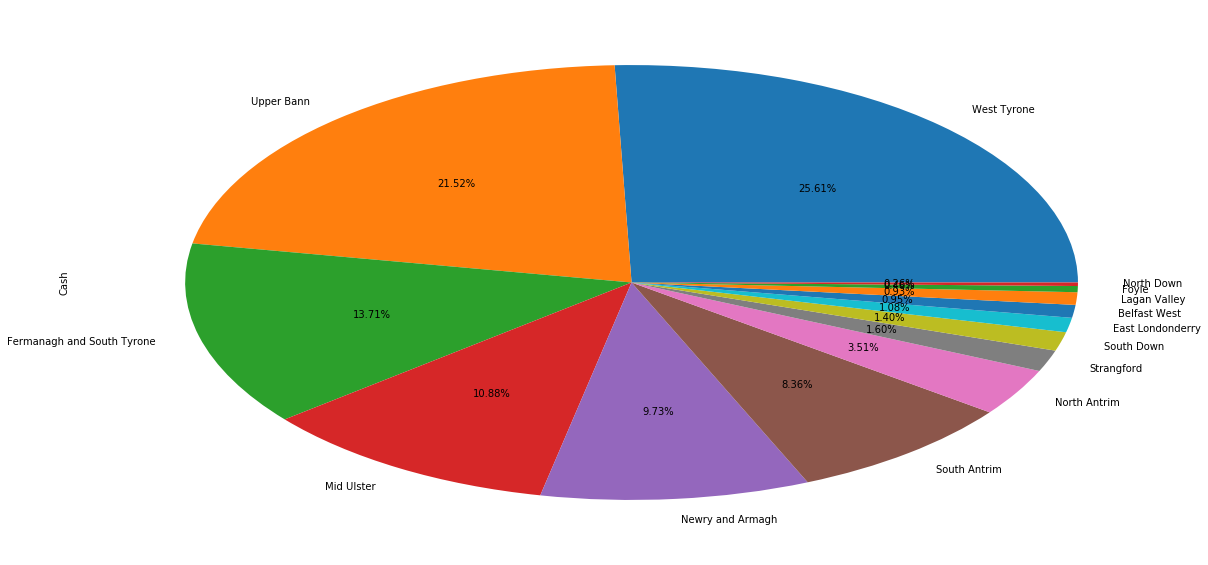

In [35]:
f,ax = plt.subplots()
_=con_df.groupby('Constituency')['Cash'].sum().sort_values(ascending=False).plot.pie(ax=ax, autopct='%.2f%%')

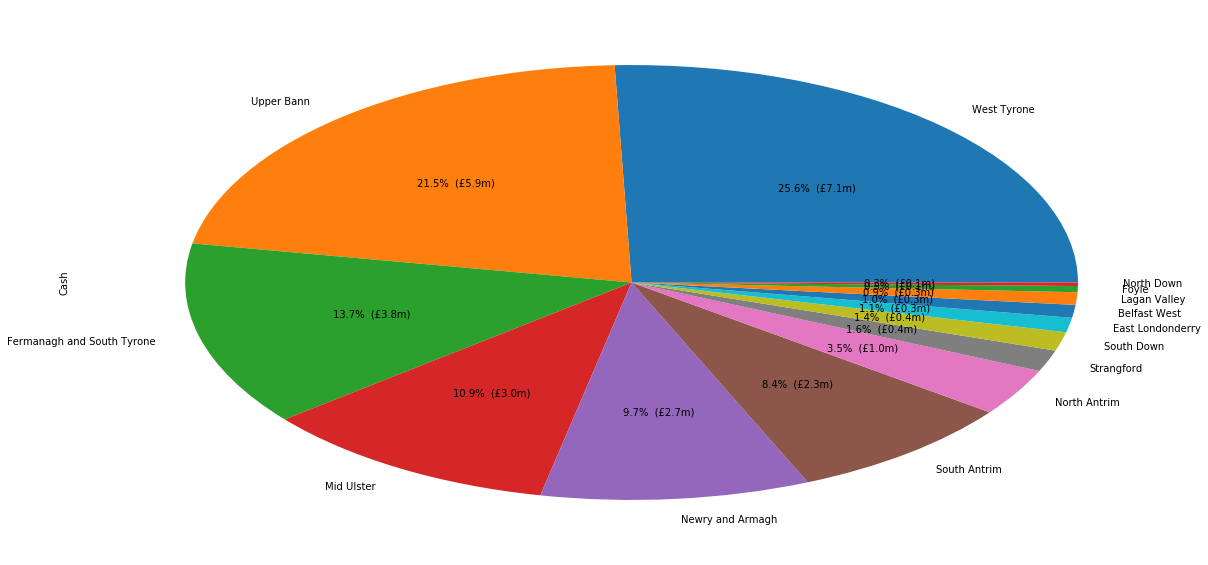

In [36]:

f,ax = plt.subplots()
_=con_df.groupby('Constituency')['Cash'].sum().sort_values(ascending=False).plot.pie(ax=ax, autopct=make_autopct(df.Cash.sum()))

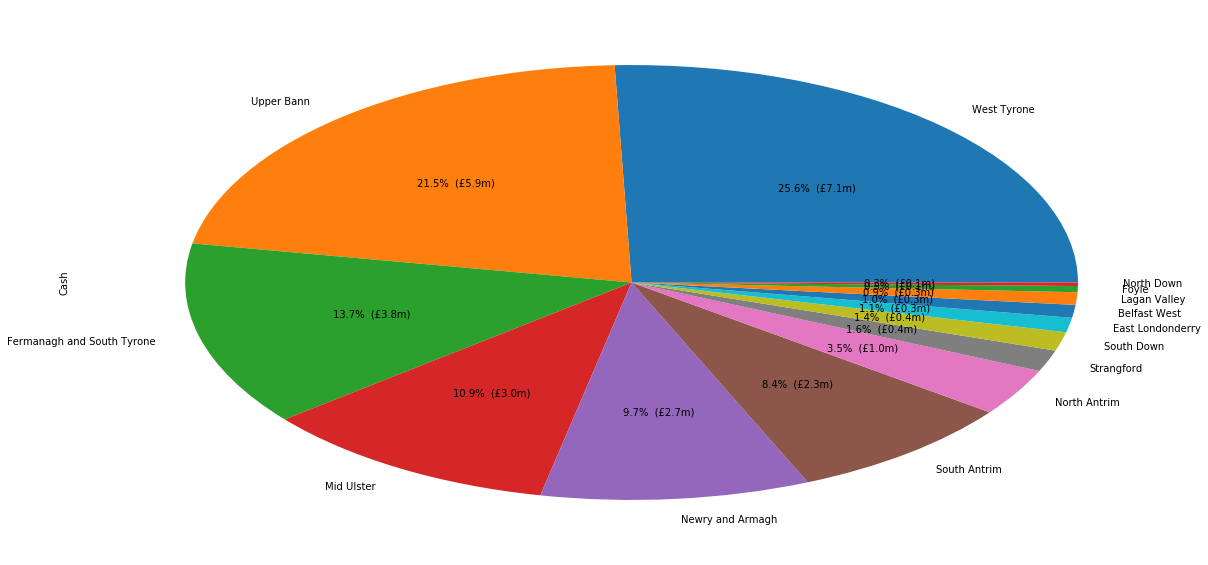

In [37]:

f,ax = plt.subplots()
_=con_df.groupby('Constituency')['Cash'].sum().sort_values(ascending=False).plot.pie(ax=ax, autopct=make_autopct(df.Cash.sum()))

## DateTime Formatting and Grouping

In [38]:
con_df.groupby(pd.TimeGrouper(key='Date',freq='M')).size()

Date
2013-01-31      2
2013-02-28      2
2013-03-31      2
2013-04-30      1
2013-05-31      5
2013-06-30      5
2013-07-31      4
2013-08-31      7
2013-09-30      6
2013-10-31      5
2013-11-30      7
2013-12-31     10
2014-01-31      5
2014-02-28      5
2014-03-31      8
2014-04-30      7
2014-05-31      6
2014-06-30     14
2014-07-31      8
2014-08-31      9
2014-09-30     11
2014-10-31     12
2014-11-30     16
2014-12-31     14
2015-01-31     27
2015-02-28     10
2015-03-31     32
2015-04-30     19
2015-05-31     16
2015-06-30     19
2015-07-31     19
2015-08-31     14
2015-09-30     40
2015-10-31    267
2015-11-30    181
2015-12-31      1
2016-01-31      0
2016-02-29     58
Freq: M, dtype: int64

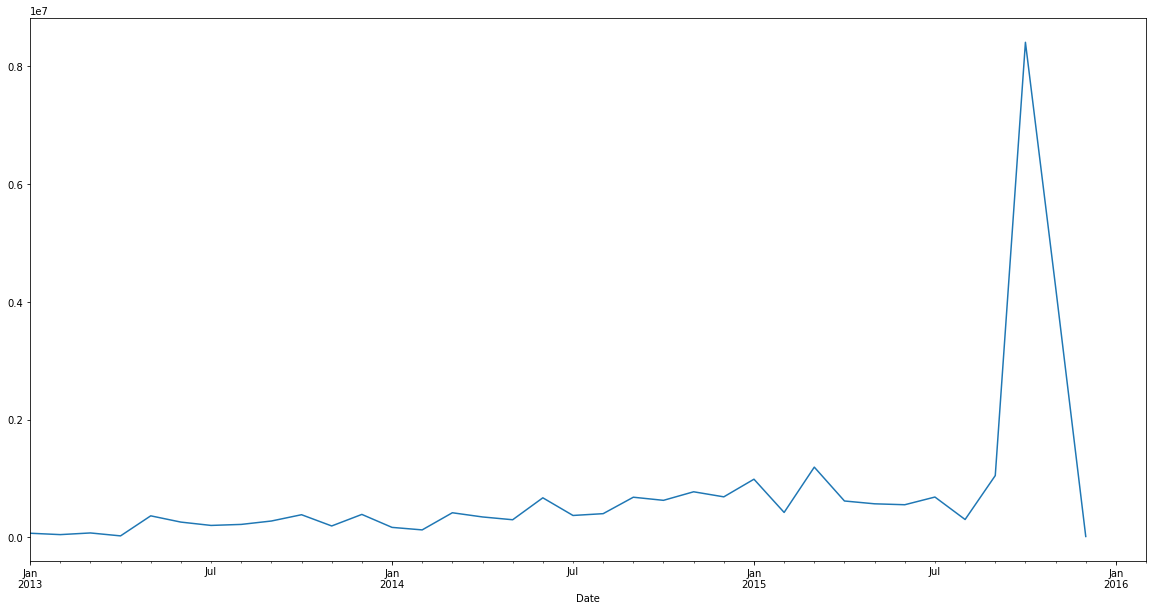

In [39]:
f,ax = plt.subplots()
con_df.groupby(pd.TimeGrouper(key='Date',freq='M'))['Cash'].sum().plot(ax=ax)

In [40]:
con_df.groupby([pd.TimeGrouper(key='Date',freq='M'),'Constituency'])['Cash']\
.sum().unstack().head()

Constituency,Belfast West,East Londonderry,Fermanagh and South Tyrone,Foyle,Lagan Valley,Mid Ulster,Newry and Armagh,North Antrim,North Down,South Antrim,South Down,Strangford,Upper Bann,West Tyrone
Date,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,64016.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6995.34,NaN,NaN,NaN
2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27822.92,NaN,NaN,NaN,19873.24
2013-03-31,37234.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38638.25
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26159.07,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,NaN,NaN,51611.56,NaN,172751.55,NaN,NaN,NaN,NaN,NaN,NaN,84285.55,58044.85


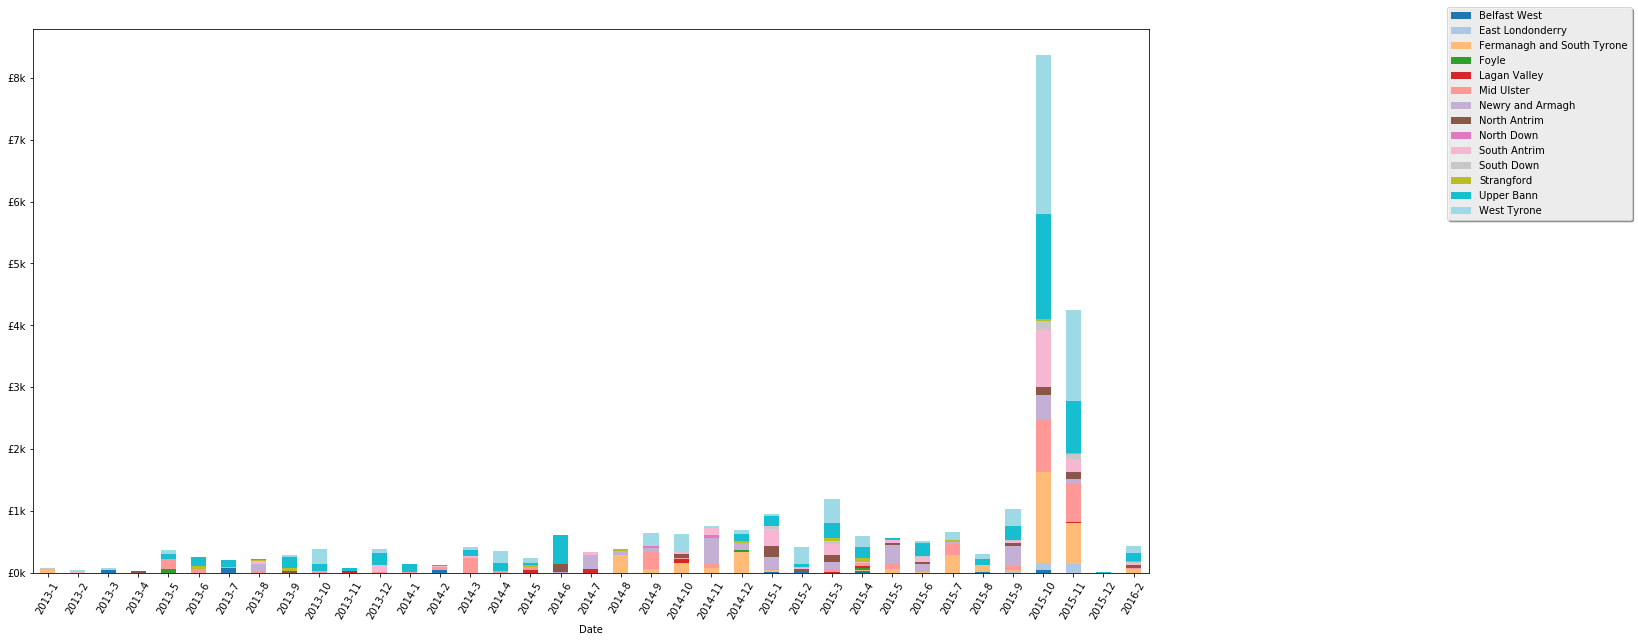

In [41]:
from matplotlib import dates
import matplotlib.ticker as tick

def _x_month_formatter(x,y):
    return '{year}-{month}'.format(year=x.year, month=x.month)

f,ax = plt.subplots()
_con_df_month_con=con_df.groupby([pd.TimeGrouper(key='Date',freq='M'),'Constituency'])['Cash'].sum().unstack()
_con_df_month_con.plot.bar(ax=ax, stacked=True, cmap=plt.get_cmap('Vega20'))

ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: '£{:,d}k'.format(y)))
ax.xaxis.set_major_formatter(tick.FixedFormatter(_con_df_month_con.index.map(lambda d: '{}-{}'.format(d.year,d.month))))
_=plt.setp( ax.xaxis.get_majorticklabels(), rotation=60 )
ax.legend(loc='upper center', bbox_to_anchor=(1.35, 1.05),
          ncol=1, fancybox=True, shadow=True)

# `seaborn`
Fancy plots and quick analysis

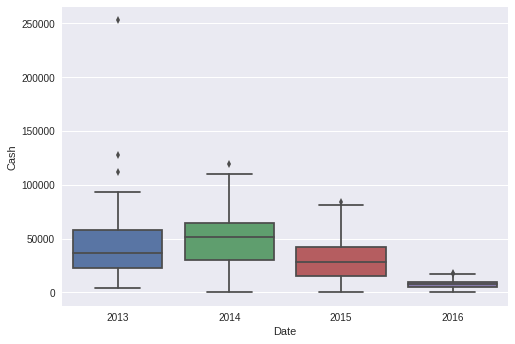

In [42]:
import seaborn as sns
f,ax = plt.subplots()
sns.boxplot(data=df, x=df.Date.dt.year, y='Cash',ax=ax)

In [43]:
df.sort_values('Cash', ascending=False)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
278,Eglinton (Timber Products) Ltd,2013-10-05,BT47,Solid Biomass Boiler,990.0,252844.05
548,McIlroy Farms Limited,2013-05-09,BT51,Solid Biomass Boiler,90.0,127605.27
333,Green Biomass Ltd,2014-04-11,BT82,Solid Biomass Boiler,99.0,119012.29
672,Paul Hobson Ltd,2013-07-08,BT71,Solid Biomass Boiler,99.0,112267.25
547,McIlroy Farms Limited,2014-03-11,BT51,Solid Biomass Boiler,99.0,109827.91
671,Paul Hobson Ltd,2014-03-28,BT71,Solid Biomass Boiler,99.0,100857.06
639,Noel Smith Ltd,2014-10-12,BT70,Solid Biomass Boiler,99.0,95380.24
546,McIlroy Farms Limited,2014-09-29,BT51,Solid Biomass Boiler,99.0,94584.81
545,McIlroy Farms Limited,2014-09-29,BT51,Solid Biomass Boiler,99.0,94300.80
105,C&L Mushrooms Ltd,2013-09-02,BT34,Solid Biomass Boiler,99.0,93080.70


In [44]:

df[df.Date>=pd.Timestamp('2015/10/01')].sort_values('Cash', ascending=False)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
180,Crann Energy Ltd,2015-10-12,BT92,Solid Biomass Boiler,99.0,65453.82
681,PM Processing Ltd,2015-10-14,BT92,Solid Biomass Boiler,99.0,64595.05
680,PM Processing Ltd,2015-10-02,BT92,Solid Biomass Boiler,99.0,59385.45
404,Inish Glow Ltd,2015-10-26,BT92,Solid Biomass Boiler,99.0,57683.51
676,Peacock Farms Poultry Ltd,2015-10-14,BT82,Solid Biomass Boiler,99.0,56757.26
677,Peacock Farms Poultry Ltd,2015-10-14,BT82,Solid Biomass Boiler,99.0,56489.45
267,Ecobiomass NI Ltd,2015-10-26,BT71,Solid Biomass Boiler,99.0,56102.54
406,Inish Glow Ltd,2015-10-26,BT92,Solid Biomass Boiler,99.0,55963.95
405,Inish Glow Ltd,2015-10-26,BT92,Solid Biomass Boiler,99.0,55401.57
266,Ecobiomass NI Ltd,2015-10-26,BT71,Solid Biomass Boiler,99.0,54811.50


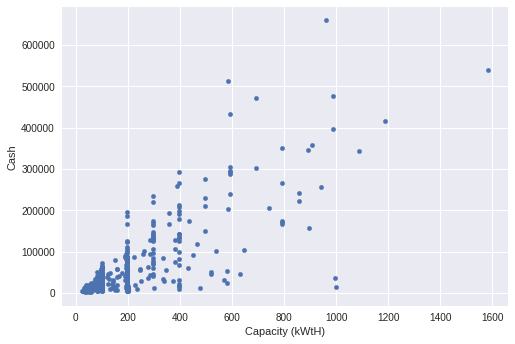

In [45]:
con_df.groupby('Company').sum().plot.scatter(x="Capacity (kWtH)",y="Cash")

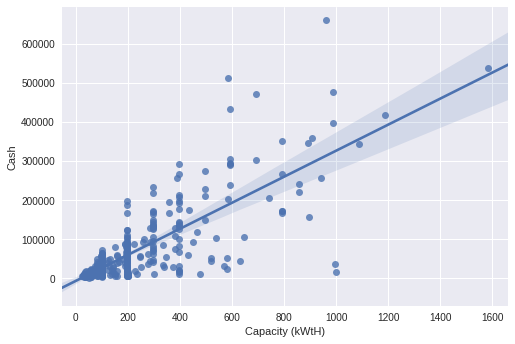

In [46]:
f,ax = plt.subplots()
sns.regplot(x="Capacity (kWtH)",y="Cash", data=con_df.groupby('Company').sum(), ax=ax)

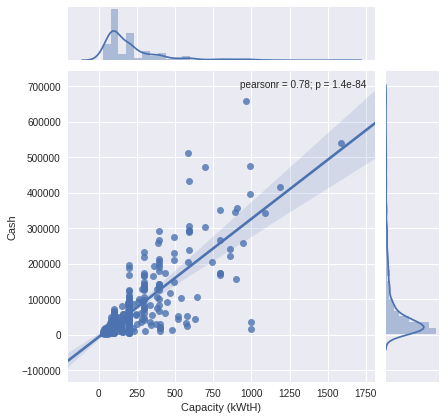

In [47]:
sns.jointplot(x="Capacity (kWtH)",y="Cash", data=con_df.groupby('Company').sum(), kind='reg')

In [48]:
company_df = con_df.groupby('Company').sum()
company_df['N'] = con_df.groupby('Company').size()
company_df['Cash Per Cap.'] = company_df['Cash']/company_df['Capacity (kWtH)']
company_df.sort_values('Cash Per Cap.', ascending=False)
##http://www.newsletter.co.uk/news/farmer-who-got-660k-for-13-rhi-boilers-says-only-80k-was-profit-1-7870639

,Capacity (kWtH),Cash,N,Cash Per Cap.
Company,,,,
Green Biomass Ltd,198.0,196804.93,2,993.964293
Noel Smith Ltd,198.0,187532.13,2,947.131970
McIlroy Farms Limited,585.0,513312.78,6,877.457744
Glenavon House Hotel (1982) Ltd,198.0,167110.13,2,843.990556
MP Poultry Ltd,297.0,234159.54,3,788.415960
Legmore Farms Ltd,396.0,293496.26,4,741.152172
GSM Farms Ltd,297.0,219257.87,3,738.241987
Ballindarragh Poultry Farm Ltd,594.0,432282.88,6,727.748956
Moore (Unidrill) Ltd,99.0,71804.01,1,725.293030


# `cufflinks`

Fancy interactive plotting with `plotly`

In [49]:
import cufflinks
con_df.groupby(pd.TimeGrouper(key='Date',freq='M'))['Cash'].sum()\
    .iplot()

In [50]:
_con_df_month_con=con_df.groupby([pd.TimeGrouper(key='Date',freq='M'),'Constituency'])['Cash'].sum().unstack()
_con_df_month_con.iplot()

In [51]:
# https://plot.ly/~bolster/211

_con_df_month_con.iplot(kind='bar', 
                        barmode='stack', 
                        filename='pybfs-stackedbar',
                        world_readable=True)

In [52]:
_con_df_month_con.iplot(kind='heatmap',colorscale='spectral')

In [53]:
_con_df_month_con.head()

Constituency,Belfast West,East Londonderry,Fermanagh and South Tyrone,Foyle,Lagan Valley,Mid Ulster,Newry and Armagh,North Antrim,North Down,South Antrim,South Down,Strangford,Upper Bann,West Tyrone
Date,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,64016.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6995.34,NaN,NaN,NaN
2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27822.92,NaN,NaN,NaN,19873.24
2013-03-31,37234.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38638.25
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26159.07,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,NaN,NaN,51611.56,NaN,172751.55,NaN,NaN,NaN,NaN,NaN,NaN,84285.55,58044.85


In [54]:
_con_df_month_con.sum().sort_values(ascending=False)

Constituency
West Tyrone                   6907832.38
Upper Bann                    5805621.25
Fermanagh and South Tyrone    3700088.66
Mid Ulster                    2935951.53
Newry and Armagh              2626124.01
South Antrim                  2255495.91
North Antrim                   947731.44
Strangford                     430424.07
South Down                     377549.61
East Londonderry               290763.19
Belfast West                   257127.67
Lagan Valley                   251102.55
Foyle                          122952.19
North Down                      69649.89
dtype: float64

In [55]:
_con_df_month_con[_con_df_month_con.sum().sort_values(ascending=False).index]\
.iplot(kind='heatmap',colorscale='spectral', filename='pybfs-heatmap',world_readable=True)

# Extra Fun Bits
## TQDM Notebook


In [56]:
from tqdm import tqdm, tqdm_notebook, tqdm_pandas, tnrange
from time import sleep

for j in tqdm_notebook(range(100), desc='2nd loop'):
    sleep(0.01)

In [57]:
_df = pd.DataFrame(np.random.randint(0, 100, (100000, 6)))
tn=tqdm_notebook()
tn.pandas(desc='Wrong kind of bar')
def worker(value):
    sleep(0.1)
    return value.sum()
_df.progress_apply(worker)


0    4951261
1    4949487
2    4950647
3    4934098
4    4955765
5    4962715
dtype: int64

In [58]:
_df = pd.DataFrame(np.random.randint(0, 100, (100000, 6)))
tn=tqdm_notebook()
tn.pandas(desc='Wrong kind of bar')
def worker(value):
    sleep(0.1)
    if not value.sum()%10:
        tn.write('Teven')
    return value.sum()
_df.progress_apply(worker)


Teven


0    4947637
1    4957360
2    4947094
3    4955715
4    4950531
5    4949797
dtype: int64

# Extra Toys

In [60]:
df[df.Company.str.contains('urch')]

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
39,Ballinderry Parish Church Hall,2015-10-27,BT28,Solid Biomass Boiler,40.0,7128.37
87,Brantry Church,2015-08-05,BT70,Solid Biomass Boiler,80.0,15291.60
251,Dundrod Presbyterian Church,2015-10-29,BT29,Solid Biomass Boiler,99.0,14421.57
268,Edengrove Presbyterian Church,2015-10-28,BT24,Solid Biomass Boiler,99.0,9490.41
373,Hebron Free Presbyterian Church,2015-02-03,BT53,Solid Biomass Boiler,99.0,39023.77
374,Hebron Free Presbyterian Church,2015-10-19,BT53,Solid Biomass Boiler,60.0,19914.29
394,Hillsborough Parish Church,2015-03-06,BT26,Solid Biomass Boiler,40.0,7461.59
395,Hillsborough Parish Church,2013-11-11,BT26,Solid Biomass Boiler,80.0,31790.13


In [61]:
df.groupby('Company')['Capacity (kWtH)'].sum().sort_values(ascending=False).head()

Company
Eglinton (Timber Products) Ltd    1584.0
John Hogg & Co Ltd                1188.0
Dennison Commercials Ltd          1089.0
Daly Poultry Ltd.                  999.0
McGrane Nurseries Ltd              997.0
Name: Capacity (kWtH), dtype: float64

In [62]:
df.groupby('Company').size().sort_values(ascending=False).head()

Company
Paul Hobson Ltd             13
John Hogg & Co Ltd          12
Dennison Commercials Ltd    11
McCaffrey Aggregates Ltd    10
Charles Hurst Ltd           10
dtype: int64

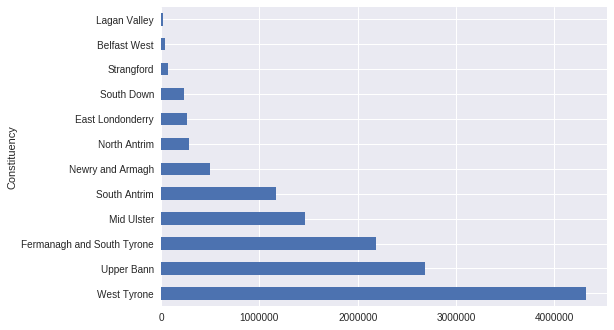

In [63]:
con_df[con_df.Date > pd.Timestamp('2015/09/28')].groupby('Constituency')['Cash'].sum().sort_values(ascending=False).plot.barh()

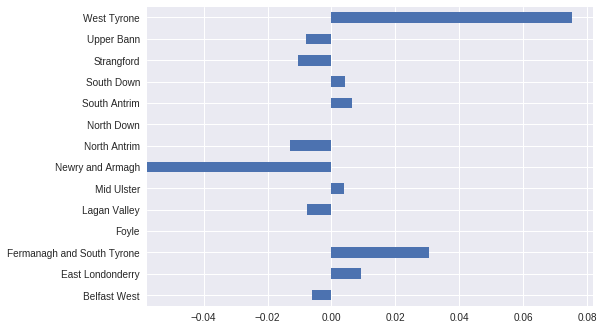

In [64]:
# All-time ratios of how much cash each constituency got
con_ratio = con_df.groupby('Constituency')['Cash'].sum()/con_df['Cash'].sum()

# October/November/December 2015 ratios of how much cash each constituency got
nov_con_ratio = con_df[con_df.Date > pd.Timestamp('2015/09/28')].groupby('Constituency')['Cash'].sum()/con_df[con_df.Date > pd.Timestamp('2015/09/28')]['Cash'].sum()

# How much each constituency increased above their normal application cost ratio in the final months of RHI
pd.concat([con_ratio, nov_con_ratio], keys=['fuggit','this'], axis=1).diff(axis=1)['this'].plot.barh()